**Importing Data**

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import io
import requests

url='https://raw.githubusercontent.com/iHabashy/Sentiment/main/training.csv'
s=requests.get(url).content

In [3]:
# Reading DataSet
df =pd.read_csv(url)

In [4]:
df

,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8
...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,4 5 7
4996,4997,My cousin passed away from the corona virus to...,4 5
4997,4998,I guess Mother Nature really hates us. Yellows...,3 5 9 10
4998,4999,So question for the day that isnt related to c...,9 10


In [5]:
len(df)

5000

Data Preprocessing


Data Cleaning

In [6]:
new_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [7]:
# Cleans the text by removing hyperlinks, hashtags, mentions, and retweets
def cleanText(text):
    text = text.lower() # Makes text lowercase
    text = re.sub('https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub('#', '', text) # Removes hashtags
    text = re.sub('@[A-Za-z0–9]+', '', text) # Removes mentions (@)
    text = re.sub('RT[\s]+', '', text) # Removes "RT"
    return text

Lowercase

In [8]:
df['CleanTweet'] = df['Tweet'].str.lower()
display(df['CleanTweet'].head(5))

0    no joke i will hop on a plane rn! (well after ...
1    banmediahouse whose is responsible for spreadi...
2    im waiting for someone to say to me that all t...
3    he is a liar. proven day night. time again. li...
4    new: u.s. coronavirus death toll reaches 4,000...
Name: CleanTweet, dtype: object

Removing Duplicated Rows

In [9]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:5]) 

Empty DataFrame
Columns: [ID, Tweet, Labels, CleanTweet]
Index: []


Converting Emojis into Word¶


In [10]:
! pip install Emot --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from emot.emo_unicode import EMOJI_UNICODE, EMOTICONS_EMO

In [12]:
def convert_emojis(text):
    for emot in EMOJI_UNICODE:
        text = text.replace(emot, "_".join(EMOJI_UNICODE[emot].replace(",","").replace(":","").split()))
    return text

Stopwords
#Created my own stopwords list.

In [13]:
my_stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", 
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce", 
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay", 
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce", 
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", 
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", 
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however", 
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", 
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", 
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob", 
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto", 
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed", 
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", 
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we", 
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+', 
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', 
                '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
                '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', 
                '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', 
                '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

print(len(my_stopwords))


1092


In [14]:
def remove_swords(text,s_list):
    a=[]
    for s in text.split():
        if s not in my_stopwords:
            a.append(s)
            #remove_swords(text ,my_stopwords)
    return a     

In [15]:
b=[]
for t in df['CleanTweet']:
    
    b.append(remove_swords(t ,my_stopwords))

In [16]:
df['List of words'] = b
df['List of words'].head()

0    [no, joke, hop, plane, rn!, (well, covid19, lol)]
1    [banmediahouse, responsible, spreading, fake, ...
2    [waiting, corona, thing, just, april, fools, j...
3    [liar., proven, day, night., time, again., lie...
4    [new:, u.s., coronavirus, death, toll, reaches...
Name: List of words, dtype: object

In [17]:
df.head(10)

,ID,Tweet,Labels,CleanTweet,List of words
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,no joke i will hop on a plane rn! (well after ...,"[no, joke, hop, plane, rn!, (well, covid19, lol)]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,banmediahouse whose is responsible for spreadi...,"[banmediahouse, responsible, spreading, fake, ..."
2,3,Im waiting for someone to say to me that all t...,3 4,im waiting for someone to say to me that all t...,"[waiting, corona, thing, just, april, fools, j..."
3,4,He is a liar. Proven day night. Time again. Li...,6,he is a liar. proven day night. time again. li...,"[liar., proven, day, night., time, again., lie..."
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,"new: u.s. coronavirus death toll reaches 4,000...","[new:, u.s., coronavirus, death, toll, reaches..."
5,6,Coronavirus impact Govt extends I-T deadlines ...,5 8,coronavirus impact govt extends i-t deadlines ...,"[coronavirus, impact, govt, extends, i-t, dead..."
6,7,"42,000 people might have died in China from Co...",6 7 8,"42,000 people might have died in china from co...","[42,000, people, might, died, china, covid19, ..."
7,8,Dear Chinese! Kindly cook your bat thoroughly ...,5 10,dear chinese! kindly cook your bat thoroughly ...,"[dear, chinese!, kindly, cook, bat, time., reg..."
8,9,This is how the govt of kenya is checking the ...,3 6 9,this is how the govt of kenya is checking the ...,"[govt, kenya, checking, temperatures, covid19,..."
9,10,My mental health hasn't suffered at all under ...,10,my mental health hasn't suffered at all under ...,"[mental, health, hasn't, suffered, coronavirus..."


In [18]:
#Combine individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['List of words'].apply(combine_text)
df['CleanTweet']

0                no joke hop plane rn! (well covid19 lol)
1       banmediahouse responsible spreading fake commu...
2              waiting corona thing just april fools joke
3       liar. proven day night. time again. lies truth...
4       new: u.s. coronavirus death toll reaches 4,000...
                              ...                        
4995    life insurance? wonder policies paying out cor...
4996    cousin passed corona virus today. today day. p...
4997    guess mother nature really hates us. yellowsto...
4998    question day isnt coronavirus. better banana s...
4999    dear corona, cancel fucking church camp summer...
Name: CleanTweet, Length: 5000, dtype: object

Remove Special Characters


In [19]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
       
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    
    tweet = re.sub(r"åÇ", "", tweet)
    
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', tweet)
    tweet = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance', #Replace URLs with 'httpaddr'
                     tweet)
    tweet = re.sub(r'£|\$', 'money', tweet) #Replace money symbols with 'moneysymb'
    tweet = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'numbers'
                   ' ', tweet)
    tweet = re.sub(r'\d+(\.\d+)?', ' ', tweet)  #Replace numbers with 'numbr'
    tweet = re.sub(r'[^\w\d\s]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = re.sub(r'^\s+|\s+?$', '', tweet.lower())
    
    
    # Contractions
   
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"luv", "love", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
   
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
  
   
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
   
    tweet = re.sub(r"e-mail", "email", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"quikly", "quickly", tweet)
    
    
    
    tweet = re.sub(r" iPhone ", " phone ", tweet)
    tweet = re.sub(r"\0rs ", " rs ", tweet) 
    
    tweet = re.sub(r"ios", "operating system", tweet)
  
    tweet = re.sub(r"programing", "programming", tweet)
    tweet = re.sub(r"bestfriend", "best friend", tweet)
    
    
    tweet = re.sub(r" J K ", " JK ", tweet)
    tweet = re.sub(r"coronavirus", " covid19", tweet)
    tweet = re.sub(r"covid", " covid19", tweet)
    tweet = re.sub(r"corrona", " covid19 ", tweet)
    tweet = re.sub(r"covid1919", " covid19 ", tweet)
    tweet = re.sub(r"_", "  ", tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ') 
        
    
        
        
    return str(tweet)

In [20]:
df['CleanTweet'] = df['CleanTweet'].apply(clean)
display(df['CleanTweet'].head(15))

0                no joke hop plane rn well  covid19 lol
1     banmediahouse responsible spreading fake commu...
2            waiting corona thing just april fools joke
3     liar proven day night time again lies truth do...
4     new u s    covid19  death toll reaches deaths ...
5        covid19  impact govt extends i t deadlines ...
6     people might died china  covid19 china underre...
7     dear chinese kindly cook bat time regards  cov...
8     govt kenya checking temperatures  covid19 stil...
9     mental health hasn t suffered    covid19  quar...
10    cannot die watching concert live corona virus ...
11    complete wanker hope die    covid19  fucking d...
12          anyone elses fb ads killing    covid19  hit
13    just heard oncle france  covid19 coma critical...
14    moment realize medication effects identical co...
Name: CleanTweet, dtype: object

Feature Engineering


Polarity


*   -1 →  Negative
*   0 → Neutral
*   1 →  Positive


In [21]:
# Returns the polarity of the Tweet's text
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [22]:
df['Polarity'] = df['CleanTweet'].apply(getPolarity)

In [23]:
df

,ID,Tweet,Labels,CleanTweet,List of words,Polarity
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000
1,2,BanMediaHouse whose is responsible for spreadi...,6,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000
2,3,Im waiting for someone to say to me that all t...,3 4,waiting corona thing just april fools joke,"[waiting, corona, thing, just, april, fools, j...",0.000000
3,4,He is a liar. Proven day night. Time again. Li...,6,liar proven day night time again lies truth do...,"[liar., proven, day, night., time, again., lie...",0.000000
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364
...,...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,4 5 7,life insurance wonder policies paying out coro...,"[life, insurance?, wonder, policies, paying, o...",0.000000
4996,4997,My cousin passed away from the corona virus to...,4 5,cousin passed corona virus today today day ple...,"[cousin, passed, corona, virus, today., today,...",0.200000
4997,4998,I guess Mother Nature really hates us. Yellows...,3 5 9 10,guess mother nature really hates us yellowston...,"[guess, mother, nature, really, hates, us., ye...",0.200000
4998,4999,So question for the day that isnt related to c...,9 10,question day isnt covid19 better banana sa...,"[question, day, isnt, coronavirus., better, ba...",0.500000


Subjectivity



*   0 → fact
*   1 → opinion



In [24]:
# Returns the subjectivity of the Tweet's text
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [25]:
df["Subjectivity"] = df["CleanTweet"].apply(getSubjectivity)
df

,ID,Tweet,Labels,CleanTweet,List of words,Polarity,Subjectivity
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000
1,2,BanMediaHouse whose is responsible for spreadi...,6,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000
2,3,Im waiting for someone to say to me that all t...,3 4,waiting corona thing just april fools joke,"[waiting, corona, thing, just, april, fools, j...",0.000000,0.000000
3,4,He is a liar. Proven day night. Time again. Li...,6,liar proven day night time again lies truth do...,"[liar., proven, day, night., time, again., lie...",0.000000,0.000000
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545
...,...,...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,4 5 7,life insurance wonder policies paying out coro...,"[life, insurance?, wonder, policies, paying, o...",0.000000,0.000000
4996,4997,My cousin passed away from the corona virus to...,4 5,cousin passed corona virus today today day ple...,"[cousin, passed, corona, virus, today., today,...",0.200000,0.750000
4997,4998,I guess Mother Nature really hates us. Yellows...,3 5 9 10,guess mother nature really hates us yellowston...,"[guess, mother, nature, really, hates, us., ye...",0.200000,0.200000
4998,4999,So question for the day that isnt related to c...,9 10,question day isnt covid19 better banana sa...,"[question, day, isnt, coronavirus., better, ba...",0.500000,0.500000


In [26]:
df.drop("Labels",axis=1,inplace=True)


In [27]:
df.head(10)

,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000
1,2,BanMediaHouse whose is responsible for spreadi...,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000
2,3,Im waiting for someone to say to me that all t...,waiting corona thing just april fools joke,"[waiting, corona, thing, just, april, fools, j...",0.000000,0.000000
3,4,He is a liar. Proven day night. Time again. Li...,liar proven day night time again lies truth do...,"[liar., proven, day, night., time, again., lie...",0.000000,0.000000
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545
5,6,Coronavirus impact Govt extends I-T deadlines ...,covid19 impact govt extends i t deadlines ...,"[coronavirus, impact, govt, extends, i-t, dead...",0.000000,0.000000
6,7,"42,000 people might have died in China from Co...",people might died china covid19 china underre...,"[42,000, people, might, died, china, covid19, ...",0.000000,0.000000
7,8,Dear Chinese! Kindly cook your bat thoroughly ...,dear chinese kindly cook bat time regards cov...,"[dear, chinese!, kindly, cook, bat, time., reg...",0.300000,0.450000
8,9,This is how the govt of kenya is checking the ...,govt kenya checking temperatures covid19 stil...,"[govt, kenya, checking, temperatures, covid19,...",0.000000,0.300000
9,10,My mental health hasn't suffered at all under ...,mental health hasn t suffered covid19 quar...,"[mental, health, hasn't, suffered, coronavirus...",-0.100000,0.200000


In [28]:
# Returns the analysis of each Tweet's text
def getSentiment(polarity):
    if polarity < 0:
      return 'Negative'
    elif polarity == 0:
      return 'Neutral'
    else:
      return 'Positive'

In [29]:
df['Analysis'] = df['Polarity'].apply(getSentiment)
df

,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity,Analysis
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000,Positive
1,2,BanMediaHouse whose is responsible for spreadi...,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000,Negative
2,3,Im waiting for someone to say to me that all t...,waiting corona thing just april fools joke,"[waiting, corona, thing, just, april, fools, j...",0.000000,0.000000,Neutral
3,4,He is a liar. Proven day night. Time again. Li...,liar proven day night time again lies truth do...,"[liar., proven, day, night., time, again., lie...",0.000000,0.000000,Neutral
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545,Positive
...,...,...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,life insurance wonder policies paying out coro...,"[life, insurance?, wonder, policies, paying, o...",0.000000,0.000000,Neutral
4996,4997,My cousin passed away from the corona virus to...,cousin passed corona virus today today day ple...,"[cousin, passed, corona, virus, today., today,...",0.200000,0.750000,Positive
4997,4998,I guess Mother Nature really hates us. Yellows...,guess mother nature really hates us yellowston...,"[guess, mother, nature, really, hates, us., ye...",0.200000,0.200000,Positive
4998,4999,So question for the day that isnt related to c...,question day isnt covid19 better banana sa...,"[question, day, isnt, coronavirus., better, ba...",0.500000,0.500000,Positive


Analysis

In [30]:
positive_tweets = df.loc[df["Analysis"] == "Positive"]
neutral_tweets = df.loc[df["Analysis"] == "Neutral"]
negative_tweets = df.loc[df["Analysis"] == "Negative"]

In [31]:
positive_tweets.head()


,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity,Analysis
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000,Positive
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545,Positive
7,8,Dear Chinese! Kindly cook your bat thoroughly ...,dear chinese kindly cook bat time regards cov...,"[dear, chinese!, kindly, cook, bat, time., reg...",0.300000,0.450000,Positive
10,11,i cannot die before watching a concert live co...,cannot die watching concert live corona virus ...,"[cannot, die, watching, concert, live, corona,...",0.136364,0.500000,Positive
13,14,Just heard that my Oncle in France has the Cov...,just heard oncle france covid19 coma critical...,"[just, heard, oncle, france, covid19, coma, cr...",0.133333,0.433333,Positive


In [32]:
negative_tweets.head()

,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity,Analysis
1,2,BanMediaHouse whose is responsible for spreadi...,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000,Negative
9,10,My mental health hasn't suffered at all under ...,mental health hasn t suffered covid19 quar...,"[mental, health, hasn't, suffered, coronavirus...",-0.100000,0.200000,Negative
11,12,"you are a complete wanker, and I hope you die ...",complete wanker hope die covid19 fucking d...,"[complete, wanker,, hope, die, coronavirus., f...",-0.250000,0.600000,Negative
20,21,if i dont survive this corona virus pandemic t...,dont survive corona virus pandemic just dumb b...,"[dont, survive, corona, virus, pandemic, just,...",-0.287500,0.250000,Negative
32,33,"neighbours, if u can hear me coughing, it's be...",neighbours can hear coughing water down wrong ...,"[neighbours,, can, hear, coughing,, water, dow...",-0.327778,0.594444,Negative


Explore the Data

In [33]:
df

,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity,Analysis
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000,Positive
1,2,BanMediaHouse whose is responsible for spreadi...,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000,Negative
2,3,Im waiting for someone to say to me that all t...,waiting corona thing just april fools joke,"[waiting, corona, thing, just, april, fools, j...",0.000000,0.000000,Neutral
3,4,He is a liar. Proven day night. Time again. Li...,liar proven day night time again lies truth do...,"[liar., proven, day, night., time, again., lie...",0.000000,0.000000,Neutral
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",new u s covid19 death toll reaches deaths ...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545,Positive
...,...,...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,life insurance wonder policies paying out coro...,"[life, insurance?, wonder, policies, paying, o...",0.000000,0.000000,Neutral
4996,4997,My cousin passed away from the corona virus to...,cousin passed corona virus today today day ple...,"[cousin, passed, corona, virus, today., today,...",0.200000,0.750000,Positive
4997,4998,I guess Mother Nature really hates us. Yellows...,guess mother nature really hates us yellowston...,"[guess, mother, nature, really, hates, us., ye...",0.200000,0.200000,Positive
4998,4999,So question for the day that isnt related to c...,question day isnt covid19 better banana sa...,"[question, day, isnt, coronavirus., better, ba...",0.500000,0.500000,Positive


Explore the Data¶


In [34]:
temp = df.groupby('Analysis').count()['CleanTweet'].reset_index().sort_values(by='CleanTweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Analysis,CleanTweet
1,Neutral,2088
2,Positive,1656
0,Negative,1256


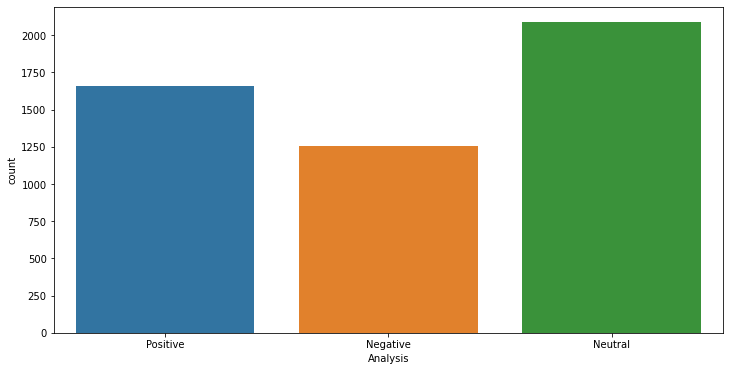

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='Analysis',data=df)

Most Common Words¶


In [36]:
from collections import Counter
cnt = Counter()
for text in df["CleanTweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covid19', 3374),
 ('corona', 2138),
 ('virus', 736),
 ('april', 672),
 ('fools', 493),
 ('just', 468),
 ('not', 409),
 ('can', 341),
 ('out', 313),
 ('people', 307)]

In [37]:
def get_n_words(corpus, direction, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
common_words = get_n_words(df['CleanTweet'], "top", 15)
rare_words = get_n_words(df['CleanTweet'], "bottom", 15)

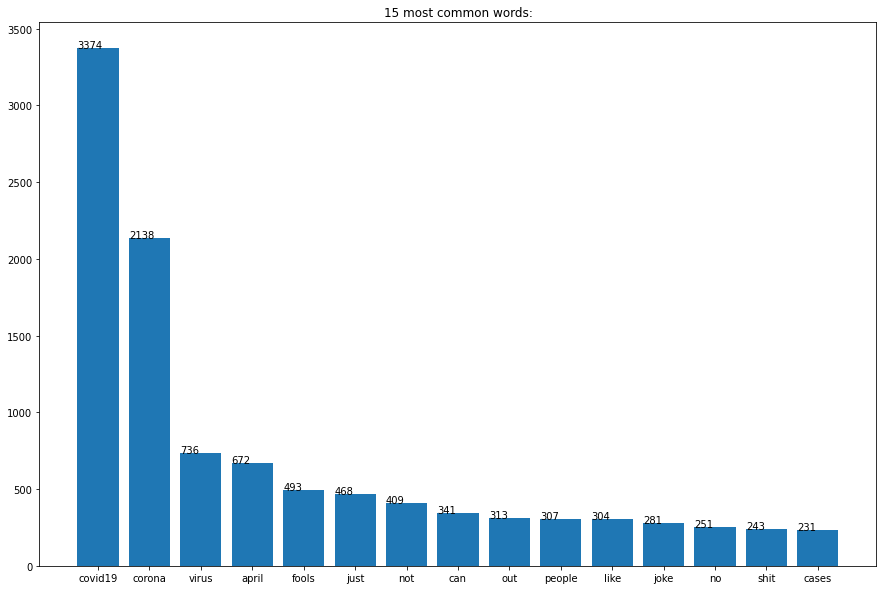

In [39]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

Wordclouds

In [40]:
# Get all the pozitive and negative tweets
Positive = df[df.Analysis =='Positive']
Negative = df[df.Analysis=='Negative']
Neutral = df[df.Analysis=='Neutral']
# Create numpy list to visualize using wordcloud
positive_text = " ".join(Positive.CleanTweet.to_numpy().tolist())
negative_text = " ".join(Negative.CleanTweet.to_numpy().tolist())
neutral_text = " ".join(Neutral.CleanTweet.to_numpy().tolist())

Get length column for each text¶


In [41]:
df['text_length'] = df['CleanTweet'].apply(len)
#Calculate average length by label types
labels = df.groupby('Analysis').mean()
labels

,ID,Polarity,Subjectivity,text_length
Analysis,,,,
Negative,2552.537420,-0.317251,0.626416,63.495223
Neutral,2480.670498,0.000000,0.077888,61.344349
Positive,2486.034420,0.331021,0.555897,65.409420


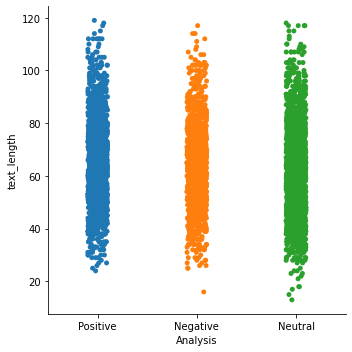

In [42]:
sns.catplot(x="Analysis", y="text_length",hue="Analysis", data=df);

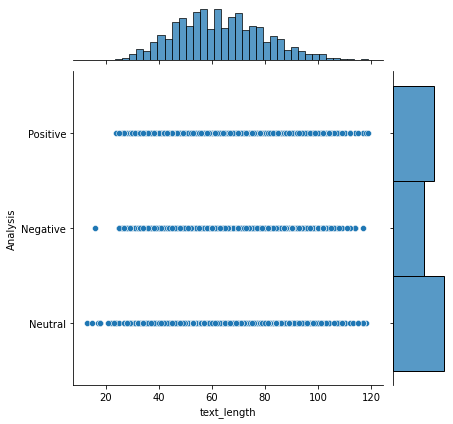

In [43]:
sns.jointplot(x=df['text_length'], y=df['Analysis']);

Tokenize

In [44]:
df['CleanTweet'] = df['CleanTweet'].apply(word_tokenize)
display(df['CleanTweet'].head(5))

0       [no, joke, hop, plane, rn, well, covid19, lol]
1    [banmediahouse, responsible, spreading, fake, ...
2    [waiting, corona, thing, just, april, fools, j...
3    [liar, proven, day, night, time, again, lies, ...
4    [new, u, s, covid19, death, toll, reaches, dea...
Name: CleanTweet, dtype: object

Lemmatizer

In [45]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [46]:
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]
df['CleanTweet'] = df['CleanTweet'].apply(lemma_wordnet)

In [47]:
display(df['CleanTweet'].head(5))

0       [no, joke, hop, plane, rn, well, covid19, lol]
1    [banmediahouse, responsible, spreading, fake, ...
2    [waiting, corona, thing, just, april, fool, joke]
3    [liar, proven, day, night, time, again, lie, t...
4    [new, u, s, covid19, death, toll, reach, death...
Name: CleanTweet, dtype: object

In [48]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet'].apply(combine_text)
df['CleanTweet']

0                   no joke hop plane rn well covid19 lol
1       banmediahouse responsible spreading fake commu...
2               waiting corona thing just april fool joke
3       liar proven day night time again lie truth do ...
4       new u s covid19 death toll reach death reporte...
                              ...                        
4995    life insurance wonder policy paying out corona...
4996    cousin passed corona virus today today day ple...
4997    guess mother nature really hate u yellowstone ...
4998    question day isnt covid19 better banana sandwi...
4999    dear corona cancel fucking church camp summer ...
Name: CleanTweet, Length: 5000, dtype: object

More Visualizations on Sentiments

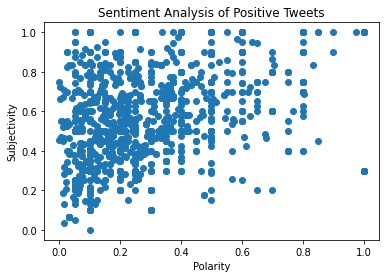

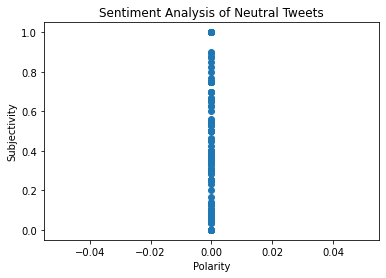

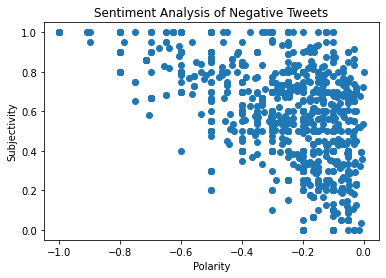

In [49]:
plt.scatter(positive_tweets["Polarity"], positive_tweets["Subjectivity"])

plt.title('Sentiment Analysis of Positive Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Neutral Tweets
plt.scatter(neutral_tweets["Polarity"], neutral_tweets["Subjectivity"])

plt.title('Sentiment Analysis of Neutral Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Negative Tweets
plt.scatter(negative_tweets["Polarity"], negative_tweets["Subjectivity"])

plt.title('Sentiment Analysis of Negative Tweets') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.show()

In [50]:
print(df["Analysis"].value_counts())
print("Total:", df.shape[0])
print()

print("Percentage of positive Tweets:", (positive_tweets.shape[0] / df.shape[0]))
print()

print("Percentage of neutral Tweets:", (neutral_tweets.shape[0] / df.shape[0]))
print()

print("Percentage of negative Tweets:", (negative_tweets.shape[0] / df.shape[0]))

Neutral     2088
Positive    1656
Negative    1256
Name: Analysis, dtype: int64
Total: 5000

Percentage of positive Tweets: 0.3312

Percentage of neutral Tweets: 0.4176

Percentage of negative Tweets: 0.2512


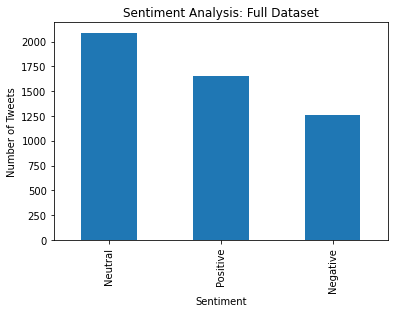

In [51]:
plt.title("Sentiment Analysis: Full Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
df["Analysis"].value_counts().plot(kind = "bar")
plt.show()

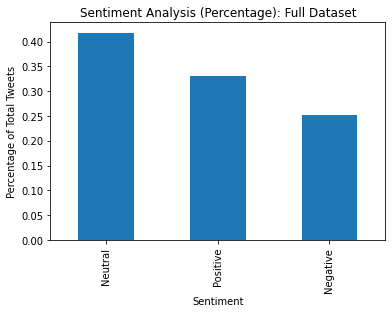

In [52]:
plt.title("Sentiment Analysis (Percentage): Full Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Percentage of Total Tweets")
((df["Analysis"].value_counts())/df.shape[0]).plot(kind = "bar")
plt.show()

In [53]:
df.head()

,ID,Tweet,CleanTweet,List of words,Polarity,Subjectivity,Analysis,text_length
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",0.800000,0.700000,Positive,38
1,2,BanMediaHouse whose is responsible for spreadi...,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",-0.150000,0.775000,Negative,83
2,3,Im waiting for someone to say to me that all t...,waiting corona thing just april fool joke,"[waiting, corona, thing, just, april, fools, j...",0.000000,0.000000,Neutral,42
3,4,He is a liar. Proven day night. Time again. Li...,liar proven day night time again lie truth do ...,"[liar., proven, day, night., time, again., lie...",0.000000,0.000000,Neutral,55
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",new u s covid19 death toll reach death reporte...,"[new:, u.s., coronavirus, death, toll, reaches...",0.136364,0.454545,Positive,98


Naive Bayes Classification


Training the model

In [54]:
corpus = df.drop(['Subjectivity', 'Polarity','Tweet','ID'],axis = 1)
corpus

,CleanTweet,List of words,Analysis,text_length
0,no joke hop plane rn well covid19 lol,"[no, joke, hop, plane, rn!, (well, covid19, lol)]",Positive,38
1,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...",Negative,83
2,waiting corona thing just april fool joke,"[waiting, corona, thing, just, april, fools, j...",Neutral,42
3,liar proven day night time again lie truth do ...,"[liar., proven, day, night., time, again., lie...",Neutral,55
4,new u s covid19 death toll reach death reporte...,"[new:, u.s., coronavirus, death, toll, reaches...",Positive,98
...,...,...,...,...
4995,life insurance wonder policy paying out corona...,"[life, insurance?, wonder, policies, paying, o...",Neutral,67
4996,cousin passed corona virus today today day ple...,"[cousin, passed, corona, virus, today., today,...",Positive,89
4997,guess mother nature really hate u yellowstone ...,"[guess, mother, nature, really, hates, us., ye...",Positive,56
4998,question day isnt covid19 better banana sandwi...,"[question, day, isnt, coronavirus., better, ba...",Positive,73


Vectorizer

We do the train/test split before the CountVectorizer to properly simulate the real world where our future data contains words we have not seen before After you train your data and chose the best model, you would then train on all of your data before predicting actual future data to maximize learning.

vect.fit(train) learns the vocabulary of the training data
vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [55]:
train, test = train_test_split(corpus, test_size = 0.2)
train.shape, test.shape

((4000, 4), (1000, 4))

In [56]:


# Bag of words

cv = CountVectorizer()
cv.fit(train)
X_train_bow = cv.fit_transform(train['CleanTweet']) #X_train
X_test_bow = train['Analysis'] #Y_train
Y_train_bow = cv.transform(test['CleanTweet']) #X_test
Y_test = test['Analysis'] # Y_test

# 3.2 TF-IDF

vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['CleanTweet'])
X_test_tfidf = train['Analysis'] 
Y_train_tdidf =vectorizer.transform(test['CleanTweet']) 

# 3.3 Hashing

hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['CleanTweet'])
X_test_hash = train['Analysis']
Y_train_hash = hv.transform(test['CleanTweet']) 

In [57]:
display("Bow-TF:IDF :", X_train_bow.shape)
df_tfidf = pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names())
display(df_tfidf.head())

'Bow-TF:IDF :'

(4000, 7091)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaa,aaaand,aasarm,aasf,abandoned,abayaas,abc,abeg,abi,...,zerkaahd,zero,zinc,zinger,zombie,zone,zoo,zoom,zoooligist,zumedari
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ridge Classifier with Hash¶


In [58]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['Analysis']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

                 precision    recall  f1-score   support

Negative Tweets       0.85      0.57      0.68       259
 Neutral Tweets       0.68      0.96      0.80       391
Positive Tweets       0.85      0.67      0.75       350

       accuracy                           0.76      1000
      macro avg       0.79      0.73      0.74      1000
   weighted avg       0.78      0.76      0.75      1000



DecisionTreeClassifier¶


In [59]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_bow,train['Analysis'])
preddt = dtclassifier.predict(Y_train_bow)
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

0.796
                 precision    recall  f1-score   support

Negative Tweets       0.85      0.57      0.68       259
 Neutral Tweets       0.68      0.96      0.80       391
Positive Tweets       0.85      0.67      0.75       350

       accuracy                           0.76      1000
      macro avg       0.79      0.73      0.74      1000
   weighted avg       0.78      0.76      0.75      1000



SVM¶


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectors = vectorizer.fit_transform(df['CleanTweet'])

In [61]:
test_vectors = vectors[4000:]
train_vectors = vectors[:4000]

In [62]:
# Perform classification with SVM, kernel=linear
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df['Analysis'][:4000])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1


print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df['Analysis'][4000:], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])
print('notr: ', report['Neutral'])
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

Results for SVC(kernel=linear)
Training time: 2.640124s; Prediction time: 0.325416s
positive:  {'precision': 0.8846153846153846, 'recall': 0.8070175438596491, 'f1-score': 0.8440366972477065, 'support': 342}
negative:  {'precision': 0.8578947368421053, 'recall': 0.659919028340081, 'f1-score': 0.745995423340961, 'support': 247}
notr:  {'precision': 0.7931726907630522, 'recall': 0.9610705596107056, 'f1-score': 0.869086908690869, 'support': 411}
                 precision    recall  f1-score   support

Negative Tweets       0.85      0.57      0.68       259
 Neutral Tweets       0.68      0.96      0.80       391
Positive Tweets       0.85      0.67      0.75       350

       accuracy                           0.76      1000
      macro avg       0.79      0.73      0.74      1000
   weighted avg       0.78      0.76      0.75      1000



Logistic Regression¶


In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg.fit(X_train_hash, X_test_hash)

LogisticRegression(multi_class='ovr')

In [64]:
train_accuracy = log_reg.score(X_train_hash, X_test_hash)
test_accuracy = log_reg.score(Y_train_hash, Y_test)

print( 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

Accuracy on Train Data : 0.83
Accuracy on Test Data  : 0.71
                 precision    recall  f1-score   support

Negative Tweets       0.85      0.57      0.68       259
 Neutral Tweets       0.68      0.96      0.80       391
Positive Tweets       0.85      0.67      0.75       350

       accuracy                           0.76      1000
      macro avg       0.79      0.73      0.74      1000
   weighted avg       0.78      0.76      0.75      1000

